In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ny_listing = pd.read_csv("listings_ny.csv")
ny_review = pd.read_csv("reviews_nyc.csv")

In [ ]:
# sa_listing = pd.read_csv("listings_seattle.csv")
# sa_review = pd.read_csv("reviews_seattle.csv")
covid = pd.read_csv("covid_month.csv")

In [ ]:
covid_ny = covid.loc[covid['state']=='New York']
covid_sa = covid.loc[covid['state']=='Washington']

In [ ]:
ny_listing['id'].nunique()

410

In [ ]:
import seaborn as sns

# Define your custom palette as a list of hex codes
custom_palette = ['#FF68D4', '#349BFF', '#000000']

# Set the palette to the custom palette
sns.set_palette(custom_palette)

# Now, all your Seaborn plots will use the colors from the custom palette you defined
sns.set_style("white")

In [ ]:
df_listing = ny_listing
df_review=ny_review
df_covid = covid_sa

In [ ]:
# Function to determine covid_flag based on month and year
def assign_covid_flag(row):
    if (row['year'] == 2019 and row['month'] >= 12) or (row['year'] == 2021 and row['month'] <= 12) or (row['year'] == 2020):
        return 'During Covid'
    elif row['year'] < 2019 or (row['year'] == 2019 and row['month'] < 12):
        return 'Before'
    else:
        return 'After'

# Function to check if a column or set of columns is a primary key
def is_primary_key(df, columns):
    if df[columns].isnull().any().any():
        return False  # Primary key cannot have null values
    return len(df) == len(df.drop_duplicates(subset=columns))

# Clean listing data

In [ ]:
df_listing['first_review']=pd.to_datetime(df_listing['first_review'])
df_listing['month']= df_listing['first_review'].dt.month
df_listing['year']= df_listing['first_review'].dt.year

In [ ]:
# Check if a single column is a primary key
print("Column 'A' as primary key:", is_primary_key(df_listing, ['id']))

# Check if a combination of columns is a primary key
print("Columns 'A' and 'B' as primary key:", is_primary_key(df_listing, ['id','month','year']))

Column 'A' as primary key: True
Columns 'A' and 'B' as primary key: False


In [ ]:
df_listing=df_listing.drop(columns='bedrooms',axis=1)

In [ ]:
df_listing['price'] = df_listing['price'].str.replace('$', '').str.replace(',', '').astype(float)
df_listing['covid_flag'] = df_listing.apply(assign_covid_flag, axis=1)

In [ ]:
# df_listing_time = df_listing.groupby(['id','host_id','room_type','property_type','has_availability', 'instant_bookable', 'accommodates', 'beds','month', 'year'])['price', 'minimum_nights','maximum_nights', 'availability_365', 'number_of_reviews',
#     'reviews_per_month'].mean().reset_index()
# print(len(df_listing_time))
# df_listing_time = pd.merge(df_listing_time,df_covid, on=['month','year'])
# df_listing_time['covid_flag'] = df_listing_time.apply(assign_covid_flag, axis=1)
# # print(len(df_listing_time))
# # print(df_listing_time.columns)

# Clean review data

In [ ]:
df_review['date']=pd.to_datetime(df_review['date'])
df_review['month']= df_review['date'].dt.month
df_review['year']= df_review['date'].dt.year
df_review_time = pd.merge(df_review,df_covid, on=['month','year'])
df_review_time['covid_flag'] = df_review_time.apply(assign_covid_flag, axis=1)

# EDA

In [ ]:
print('Unique hosts',df_listing['host_id'].nunique())
print('Unique listings',df_listing['id'].nunique())

Unique hosts 191
Unique listings 410


## Overview of data

In [ ]:
df_covid.columns



Index(['Unnamed: 0', 'month', 'year', 'state', 'cases', 'deaths'], dtype='object')

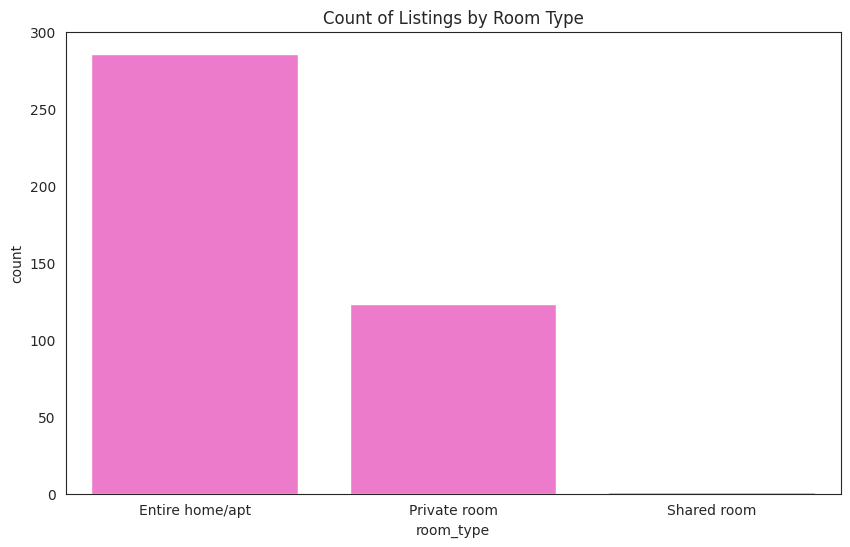

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Listings Count by Room Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df_listing, x='room_type')
plt.title('Count of Listings by Room Type')
plt.show()


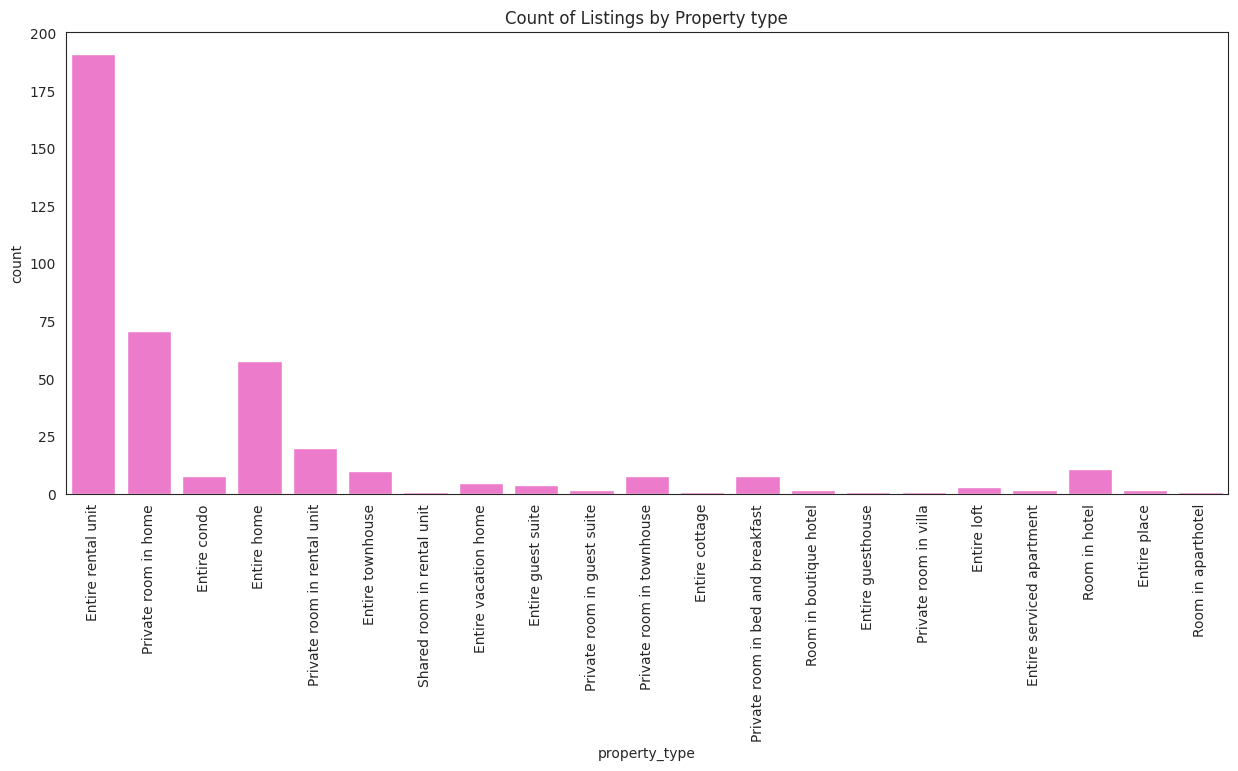

In [ ]:
# 3. Listings Count by Property type
plt.figure(figsize=(15, 6))
sns.countplot(data=df_listing, x='property_type')
plt.title('Count of Listings by Property type')
plt.xticks(rotation=90)
plt.show()


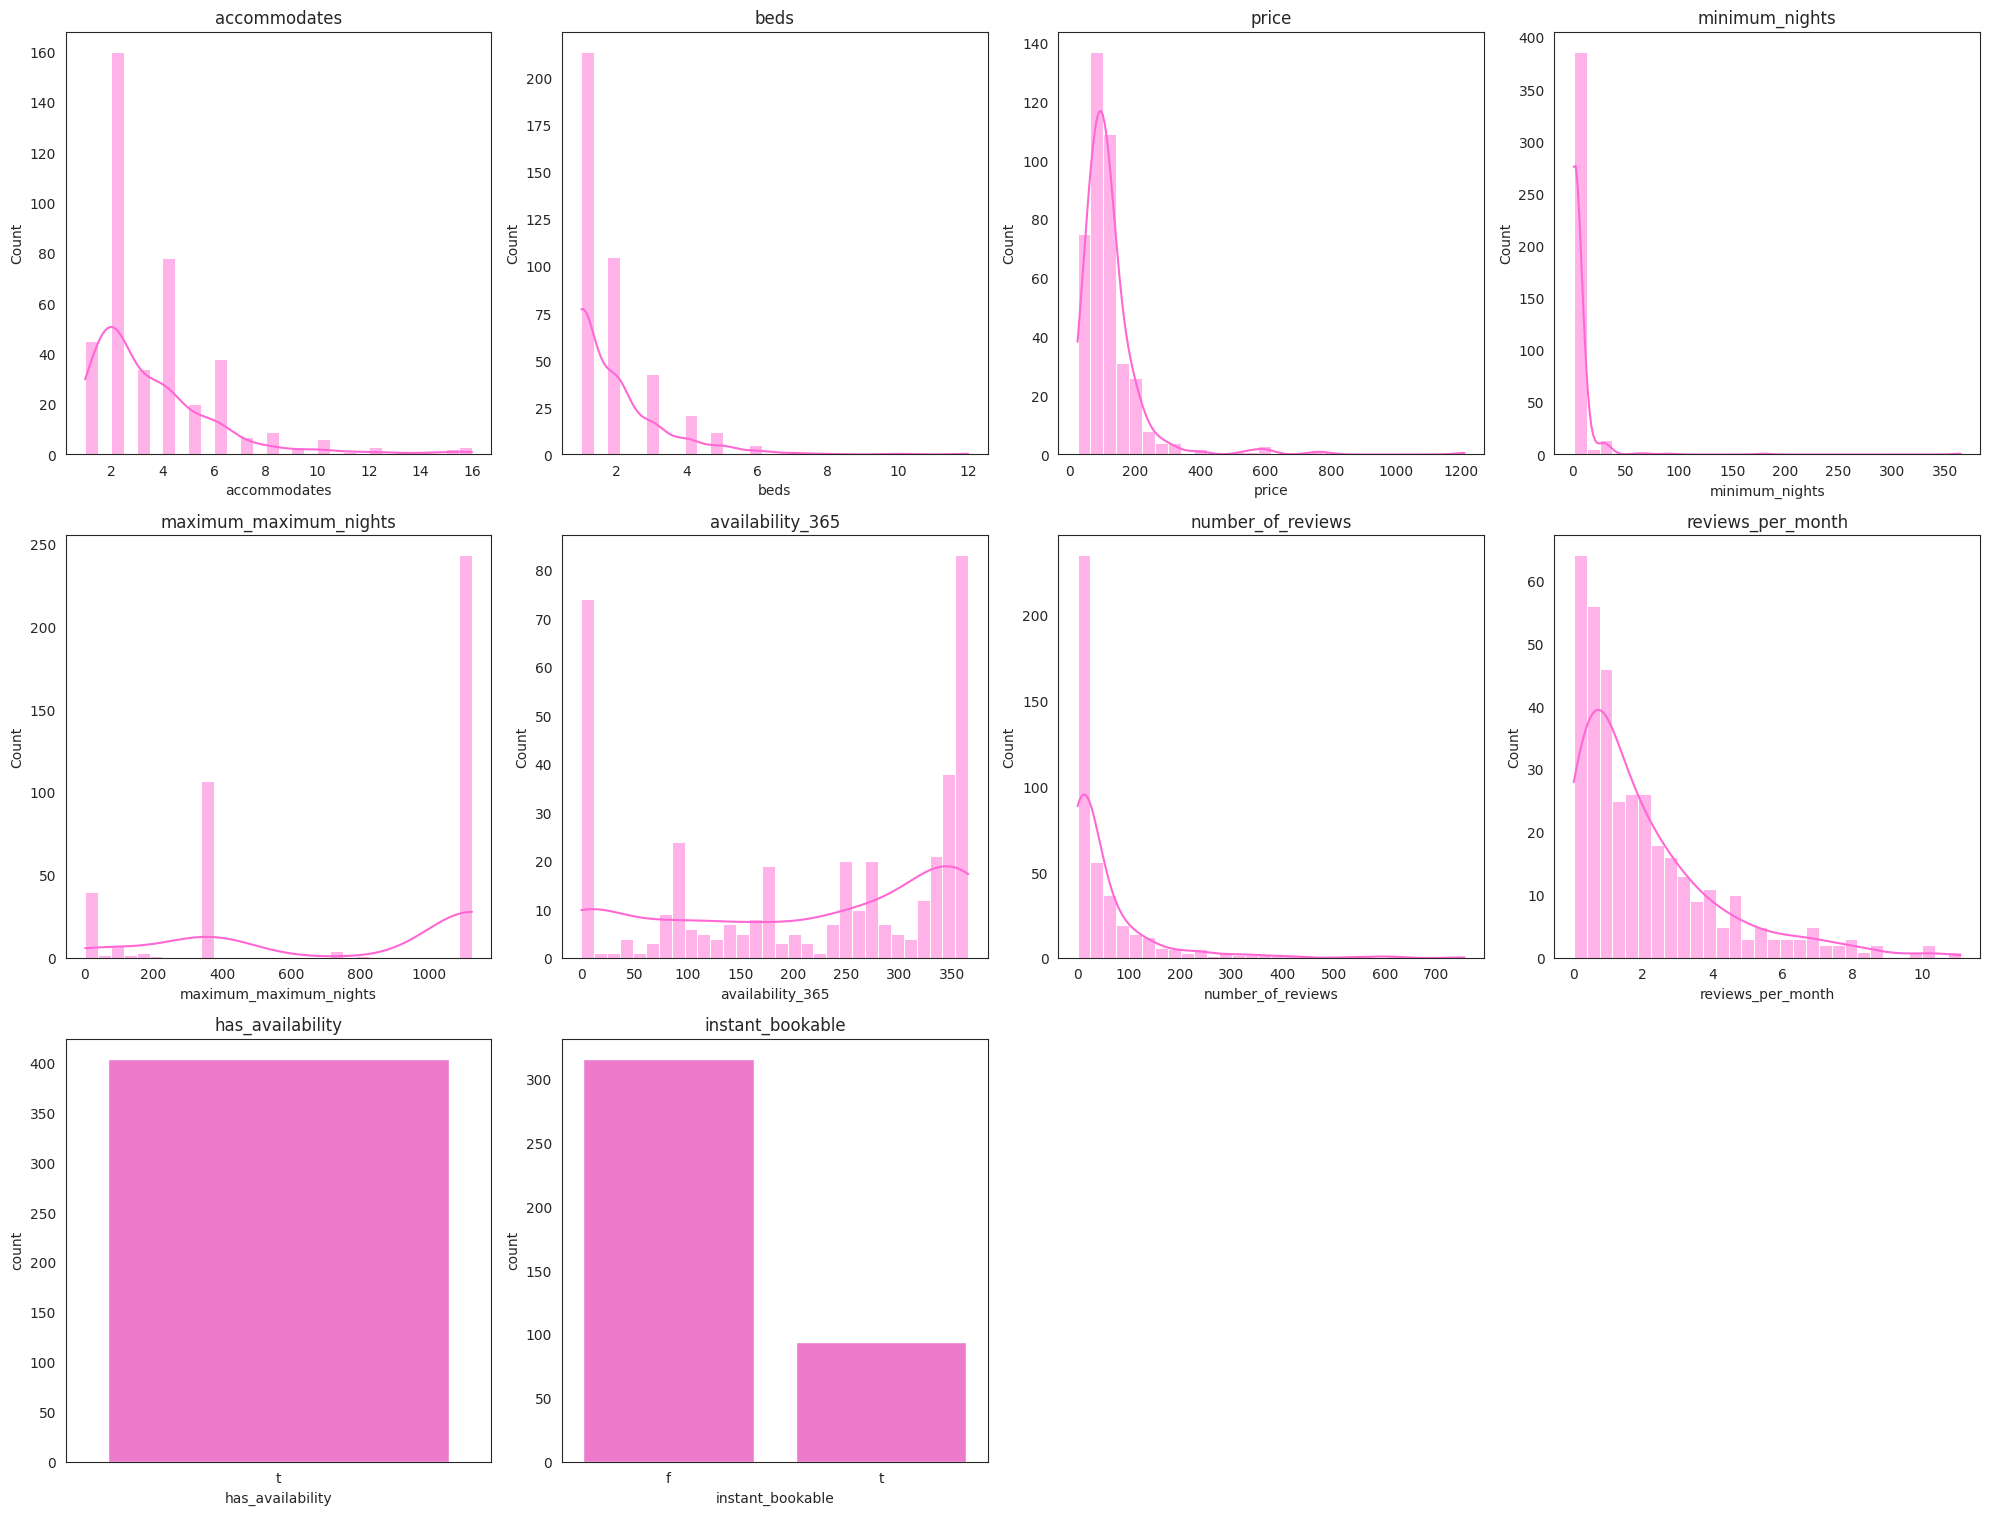

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust the figsize to accommodate the number of subplots
fig, axs = plt.subplots(8, 4, figsize=(20, 40))

# List of numerical variables to plot
numerical_vars = [
    'accommodates', 'beds', 'price', 'minimum_nights',
    'maximum_maximum_nights', 'availability_365', 'number_of_reviews',
    'reviews_per_month'
]

# Plot numerical variables
for i, var in enumerate(numerical_vars):
    row = i // 4
    col = i % 4
    sns.histplot(data=df_listing, x=var, ax=axs[row, col], kde=True, bins=30)
    axs[row, col].set_title(var)

# Assuming 'has_availability' and 'instant_bookable' are binary/categorical
categorical_vars = ['has_availability', 'instant_bookable']

# Plot categorical variables
for i, var in enumerate(categorical_vars):
    row = (len(numerical_vars) + i) // 4
    col = (len(numerical_vars) + i) % 4
    sns.countplot(data=df_listing, x=var, ax=axs[row, col])
    axs[row, col].set_title(var)

# Remove unused subplots if any
for i in range(len(numerical_vars) + len(categorical_vars), 8 * 4):
    fig.delaxes(axs[i // 4, i % 4])

plt.tight_layout()
plt.show()


# Price relationship with room, property, beds, accomodates

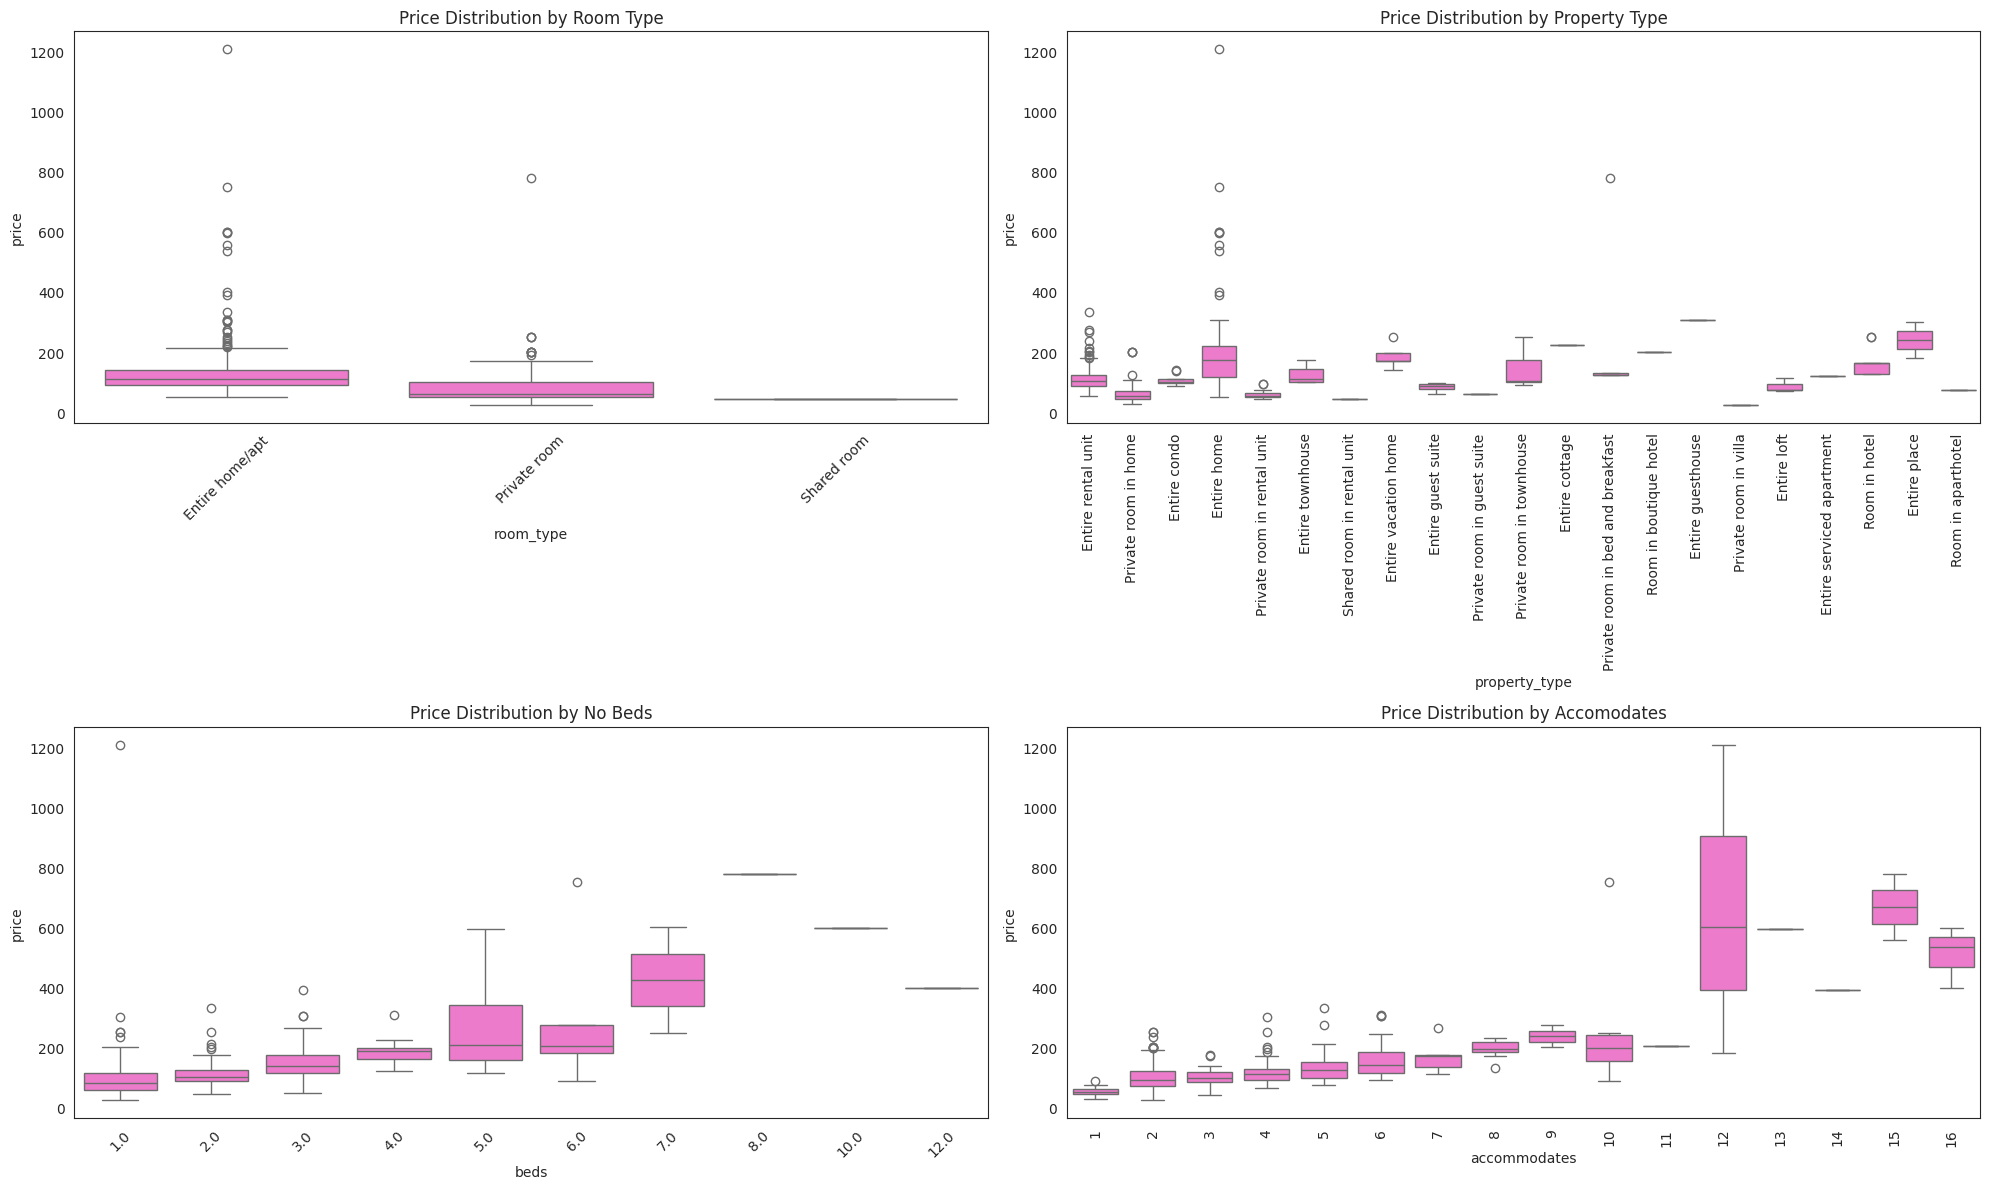

In [ ]:


# Set up the matplotlib figure
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Plot for 'room_type'
sns.boxplot(data=df_listing, x='room_type', y='price', ax=axs[0,0])
axs[0,0].set_title('Price Distribution by Room Type')
axs[0,0].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Plot for 'property_type'
# Note: If there are too many property types, consider filtering or aggregating them.
sns.boxplot(data=df_listing, x='property_type', y='price', ax=axs[0,1])
axs[0,1].set_title('Price Distribution by Property Type')
axs[0,1].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability; adjust angle as needed

# Plot for 'room_type'
sns.boxplot(data=df_listing, x='beds', y='price', ax=axs[1,0])
axs[1,0].set_title('Price Distribution by No Beds')
axs[1,0].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Plot for 'property_type'
# Note: If there are too many property types, consider filtering or aggregating them.
sns.boxplot(data=df_listing, x='accommodates', y='price', ax=axs[1,1])
axs[1,1].set_title('Price Distribution by Accomodates')
axs[1,1].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability; adjust angle as needed

plt.tight_layout()
plt.show()


# Prices across time - Mean

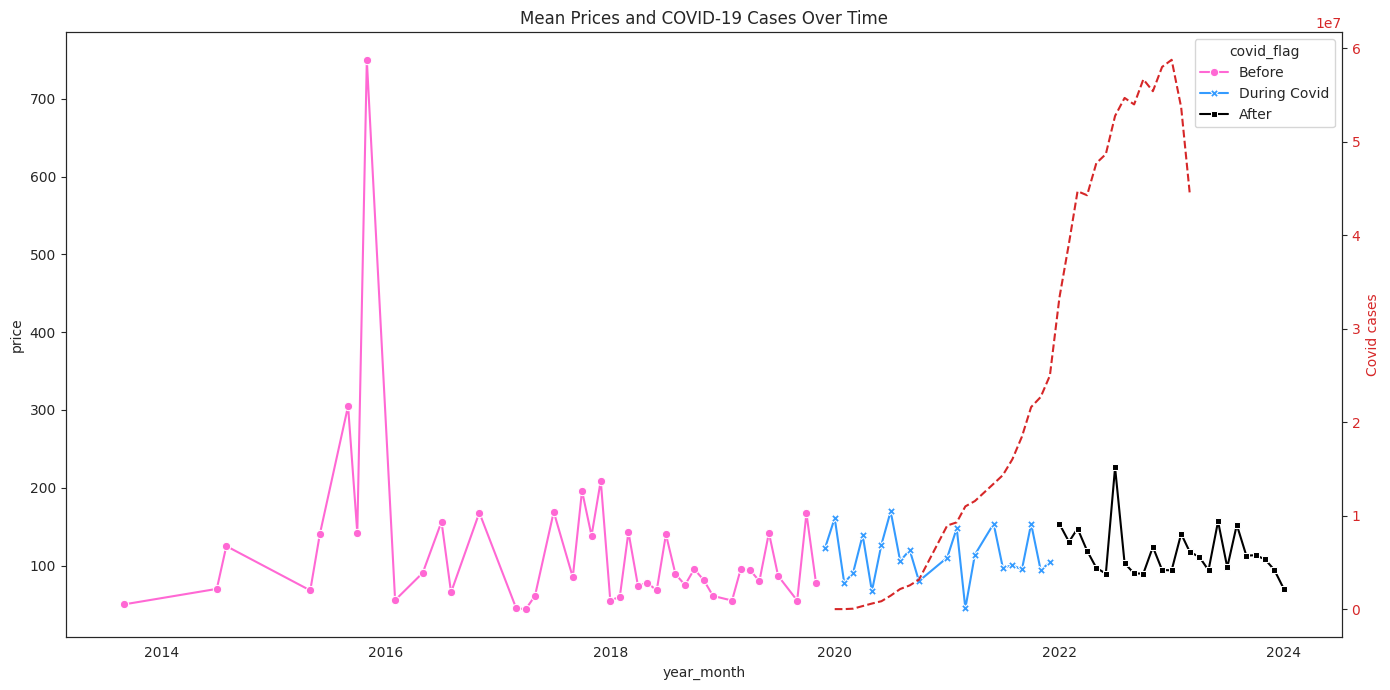

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_listing is your DataFrame and it contains 'month', 'year', 'price', and 'covid_flag' columns
# Also assuming df_covid is your DataFrame and it contains 'month', 'year', 'cases', 'deaths', and 'covid_flag' columns
df_covid['covid_flag'] = df_covid.apply(assign_covid_flag, axis=1)
# Group the data by 'year', 'month', and 'covid_flag', then calculate the mean price and sum of cases and deaths
mean_prices = df_listing.groupby(['year', 'month', 'covid_flag'])['price'].mean().reset_index()
cases_deaths = df_covid.groupby(['year', 'month', 'covid_flag']).agg({'cases':'sum', 'deaths':'sum'}).reset_index()

# Merge the two datasets on 'year', 'month', and 'covid_flag'
mean_prices = pd.merge(mean_prices, cases_deaths, on=['year', 'month', 'covid_flag'], how='left')

# Sort the results for better readability
mean_prices = mean_prices.sort_values(by=['year', 'month'])

mean_prices['year_month'] = pd.to_datetime(mean_prices[['year', 'month']].assign(DAY=1))

# Plotting
plt.figure(figsize=(14, 7))

# Plot the mean prices on the primary y-axis
price_plot = sns.lineplot(data=mean_prices, x='year_month', y='price', hue='covid_flag', style='covid_flag', markers=True, dashes=False)

# Create secondary y-axis for cases
ax2 = plt.gca().twinx()

# Plot the cases on the secondary y-axis
color_cases = 'tab:red'
ax2.set_ylabel('Cases', color=color_cases)
cases_plot, = ax2.plot(mean_prices['year_month'], mean_prices['cases'], color=color_cases, label='Cases', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color_cases)

# Title and customizations
plt.title('Mean Prices and COVID-19 Cases Over Time')
plt.xlabel('Time (Year and Month)')
plt.ylabel('Covid cases')
plt.xticks(rotation=45)

# Adjust legend to include only the desired elements
lines, labels = price_plot.get_legend_handles_labels()
lines.append(cases_plot)
labels.append('Cases')
# plt.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
mean_prices.head()

,year,month,covid_flag,price,cases,deaths,year_month
0,2013.0,9.0,Before,50.0,NaN,NaN,2013-09-01
1,2014.0,7.0,Before,70.0,NaN,NaN,2014-07-01
2,2014.0,8.0,Before,125.0,NaN,NaN,2014-08-01
3,2015.0,5.0,Before,68.0,NaN,NaN,2015-05-01
4,2015.0,6.0,Before,140.0,NaN,NaN,2015-06-01


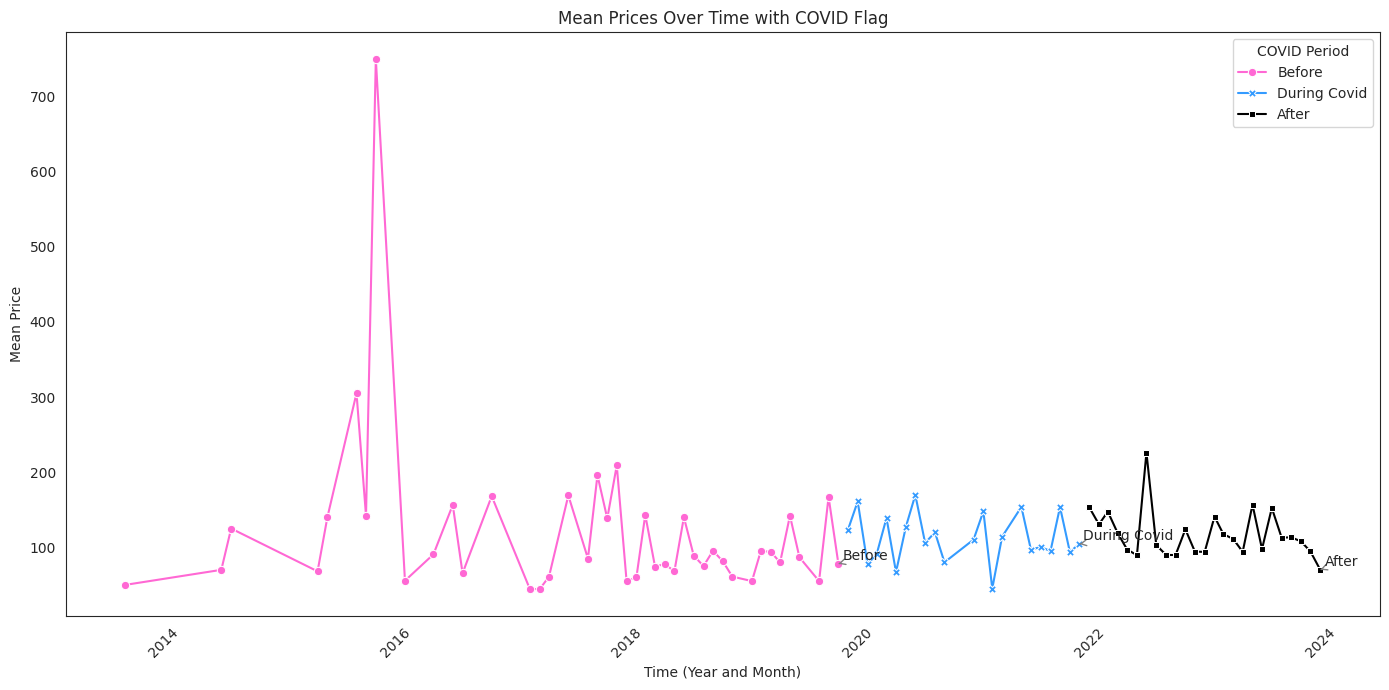

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_listing is your DataFrame and it contains 'month', 'year', 'price', and 'covid_flag' columns

# Group the data by 'year', 'month', and 'covid_flag', then calculate the mean price
mean_prices = df_listing.groupby(['year', 'month', 'covid_flag'])['price'].mean().reset_index()

# Sort the results for better readability
mean_prices = mean_prices.sort_values(by=['year', 'month'])

# Creating a 'year_month' column for plotting
mean_prices['year_month'] = pd.to_datetime(mean_prices[['year', 'month']].assign(DAY=1))

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=mean_prices, x='year_month', y='price', hue='covid_flag', style='covid_flag', markers=True, dashes=False)
plt.title('Mean Prices Over Time with COVID Flag')
plt.xlabel('Time (Year and Month)')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.legend(title='COVID Period')
plt.tight_layout()

# Optionally, you can annotate specific points or periods directly on the plot
for period in mean_prices['covid_flag'].unique():
    period_data = mean_prices[mean_prices['covid_flag'] == period]
    # This is a simplistic approach; you might want to fine-tune the positioning and selection of points to annotate
    if not period_data.empty:
        plt.annotate(period,
                     xy=(period_data.iloc[-1]['year_month'], period_data.iloc[-1]['price']),
                     xytext=(3,3), textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', color='gray'))

# Show the plot
plt.show()

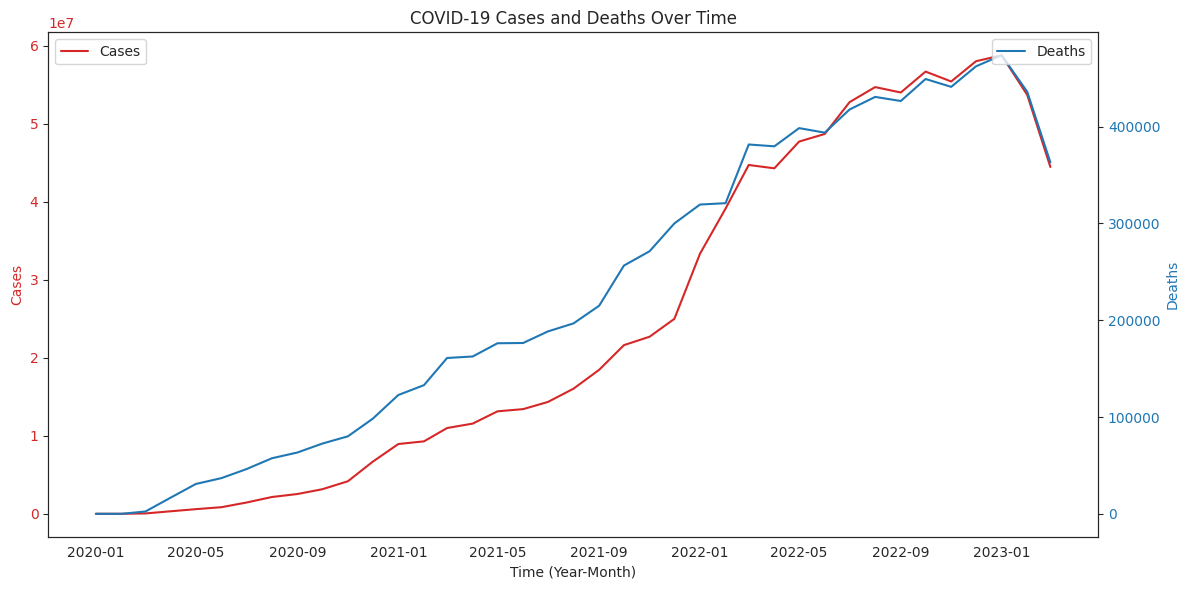

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_aggregated is already created and contains 'date', 'cases', 'deaths'
# Create 'date' column
df_covid['date'] = pd.to_datetime(df_covid[['year', 'month']].assign(DAY=1))

# Aggregate cases and deaths by the new datetime column if necessary
df_aggregated = df_covid.groupby('date').agg({'cases':'sum', 'deaths':'sum'}).reset_index()
# Set the 'date' column as the index for easier plotting
df_aggregated.set_index('date', inplace=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Time (Year-Month)')
ax1.set_ylabel('Cases', color=color)
ax1.plot(df_aggregated.index, df_aggregated['cases'], color=color, label='Cases')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis with the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Deaths', color=color)
ax2.plot(df_aggregated.index, df_aggregated['deaths'], color=color, label='Deaths')
ax2.tick_params(axis='y', labelcolor=color)

# Title and customizations
plt.title('COVID-19 Cases and Deaths Over Time')
fig.tight_layout()
plt.xticks(rotation=45)  # Rotate dates for better readability

# Show plot with legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# Prices during and after covid for room, property, beds, accomodates

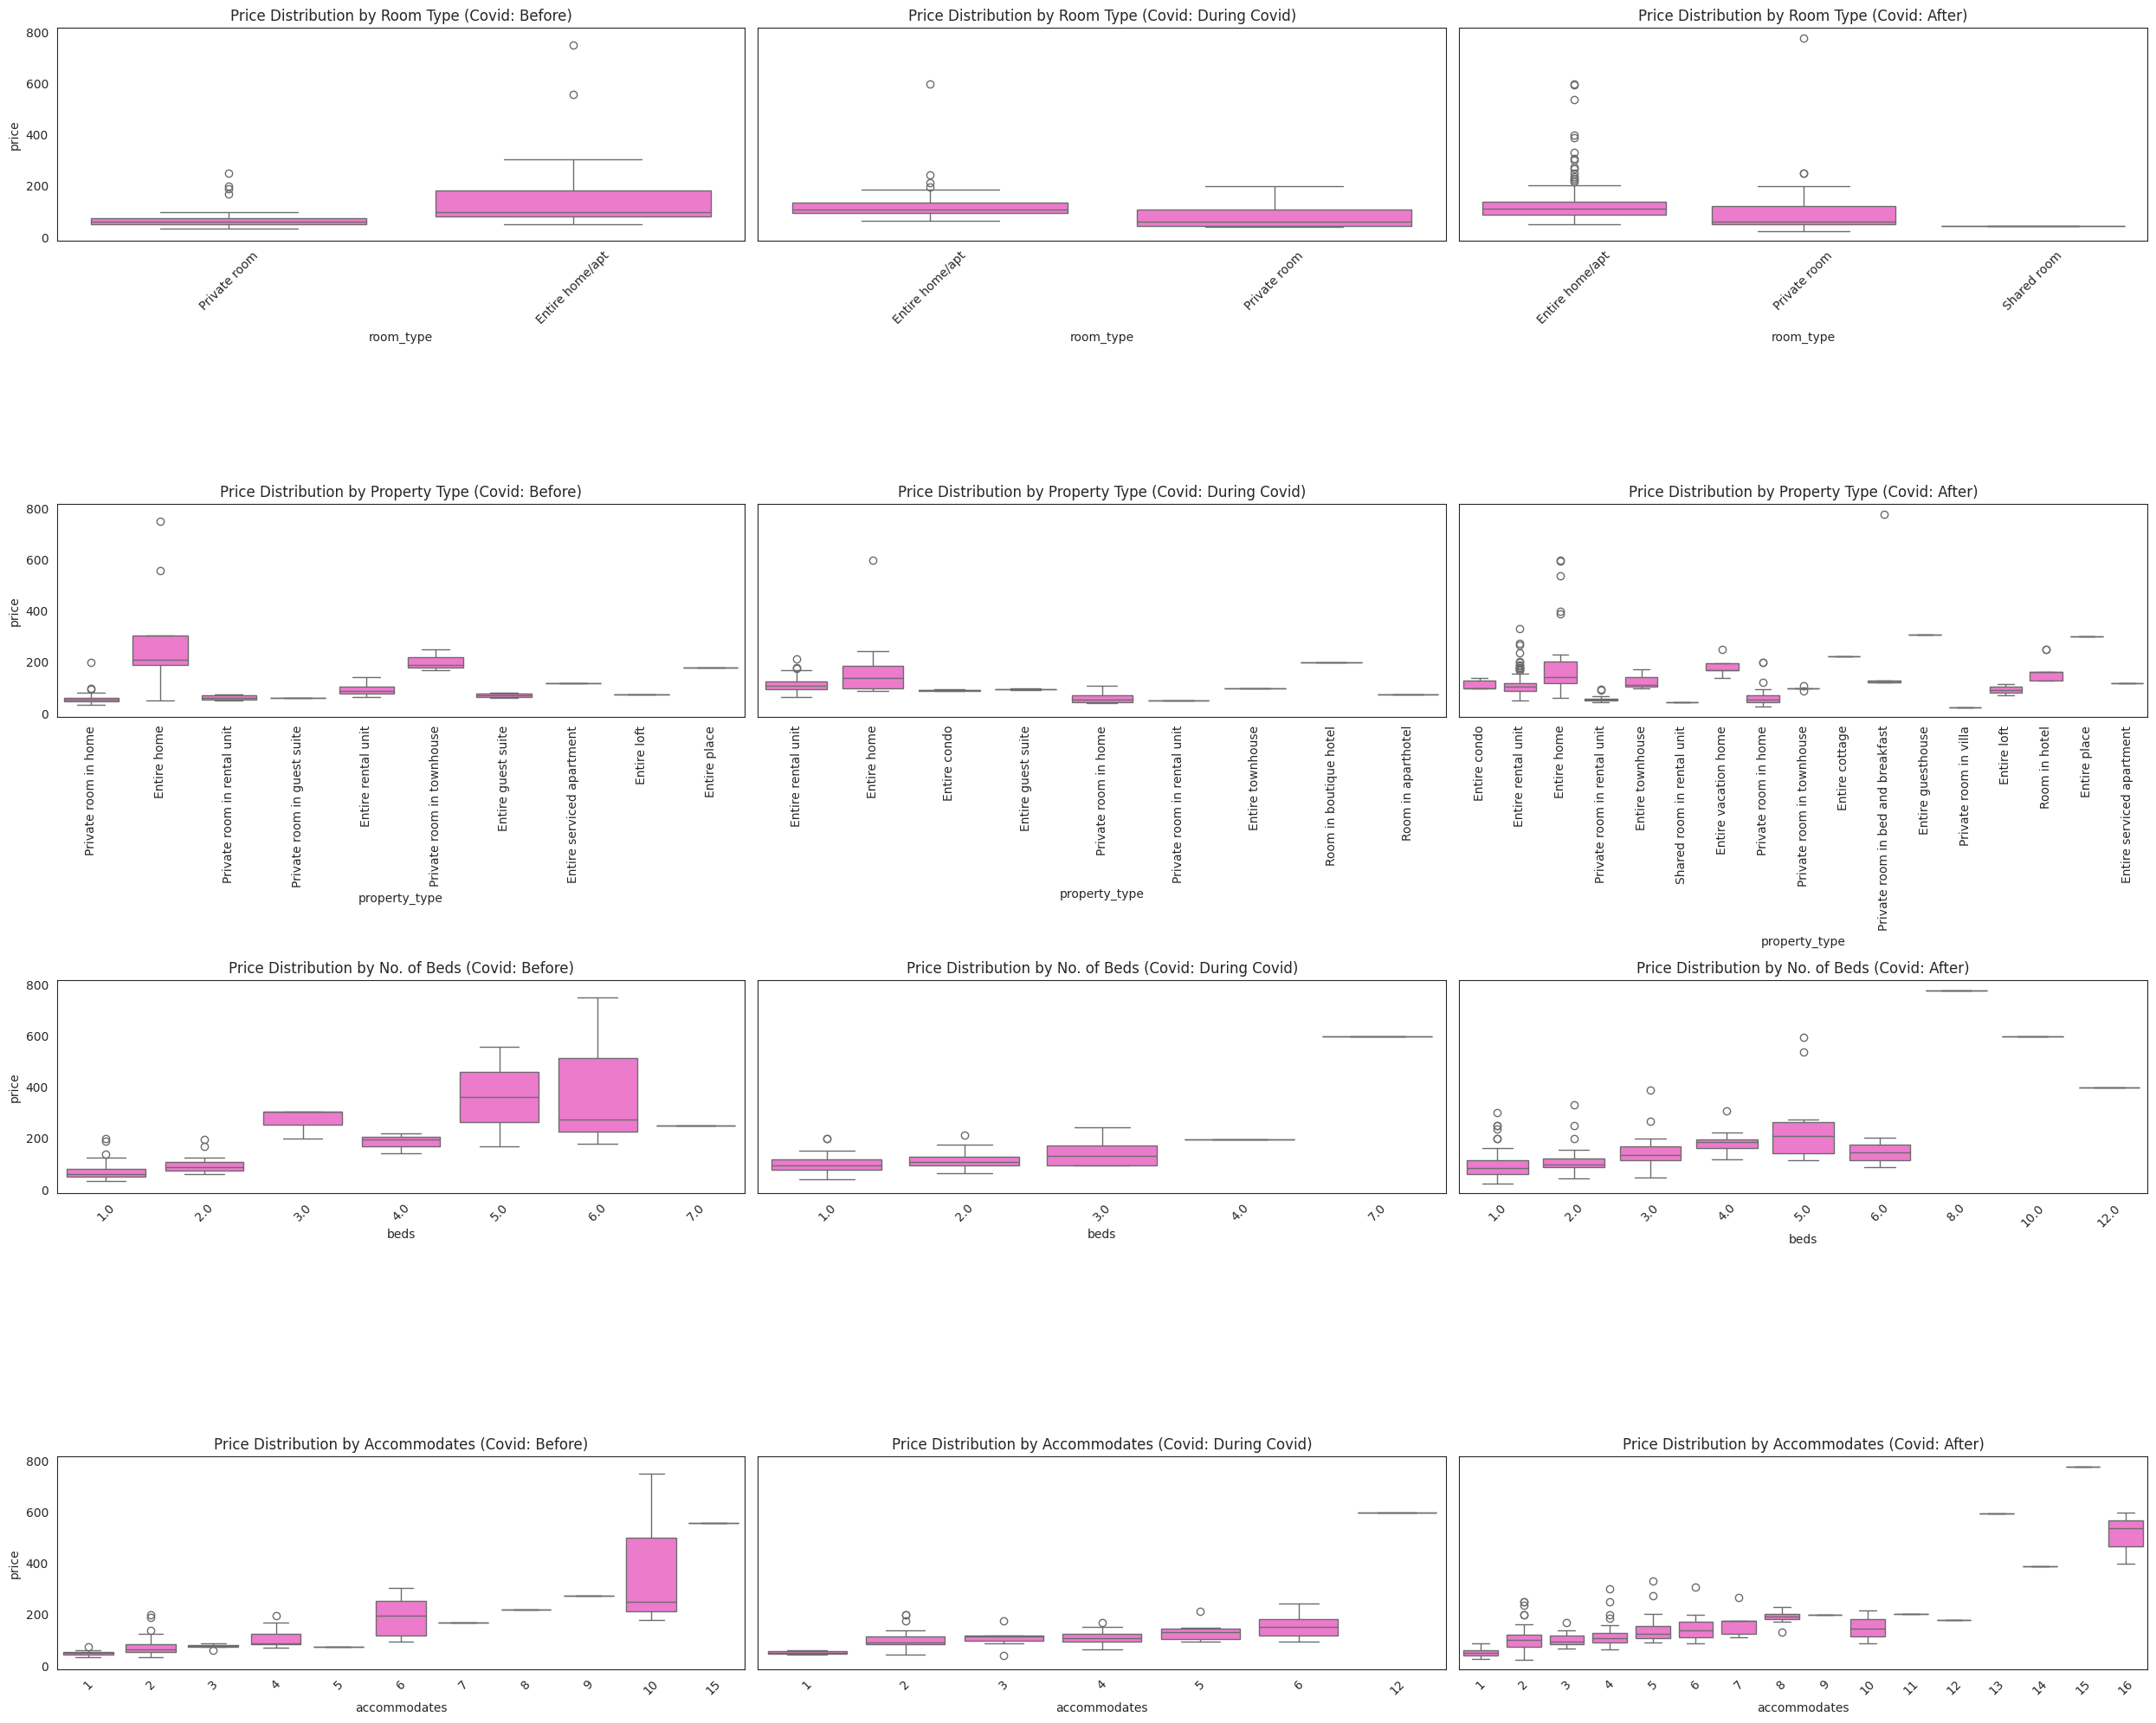

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure with 4 rows for each remaining category and 3 columns for each covid_flag condition
fig, axs = plt.subplots(4, 3, figsize=(25, 20), sharey=True)  # Sharey to compare across plots

# Updated categories and their titles for plotting
categories = ['room_type', 'property_type', 'beds', 'accommodates']
titles = ['Price Distribution by Room Type',
          'Price Distribution by Property Type',
          'Price Distribution by No. of Beds',
          'Price Distribution by Accommodates']

# Ensure the dataframe is filtered correctly for 'price' and 'covid_flag'
df_listing_filtered = df_listing.loc[df_listing['price'] <= 1000]

# Iterate over each category to create boxplots for each covid_flag condition
for i, category in enumerate(categories):
    for j, covid_flag in enumerate(['Before', 'During Covid', 'After']):
        # Filter the DataFrame for each covid_flag condition
        filtered_df = df_listing_filtered[df_listing_filtered['covid_flag'] == covid_flag]

        # Create the boxplot
        sns.boxplot(data=filtered_df, x=category, y='price', ax=axs[i, j])

        # Set the title for the first column of each category
        axs[i, j].set_title(f"{titles[i]} (Covid: {covid_flag})")

        # Rotate x labels for better readability
        # Set vertical if the category is 'property_type'
        rotation_angle = 90 if category == 'property_type' else 45
        axs[i, j].tick_params(axis='x', rotation=rotation_angle)

plt.tight_layout()
plt.show()


In [ ]:
mean_prices = df_listing_filtered.groupby(['covid_flag'])['price'].mean().reset_index()

# To view the result
print(mean_prices)

     covid_flag       price
0         After  121.853755
1        Before  114.520548
2  During Covid  120.324675


## Without outlier removal - We dont need to use this

In [ ]:
# # Set up the matplotlib figure with 4 rows for each category and 3 columns for each covid_flag condition
# fig, axs = plt.subplots(4, 3, figsize=(20, 24), sharey=True)  # Sharey to compare across plots

# # Categories and their titles for plotting
# categories = ['room_type', 'property_type', 'beds', 'accommodates']
# titles = ['Price Distribution by Room Type',
#           'Price Distribution by Property Type',
#           'Price Distribution by No. of Beds',
#           'Price Distribution by Accommodates']
# # Iterate over each category to create boxplots for each covid_flag condition
# for i, category in enumerate(categories):
#     for j, covid_flag in enumerate(['Before', 'During Covid', 'After']):
#         # Filter the DataFrame for each covid_flag condition
#         filtered_df = df_listing_time[df_listing_time['covid_flag'] == covid_flag]

#         # Create the boxplot
#         sns.boxplot(data=filtered_df, x=category, y='price', ax=axs[i, j])

#         # Set the title for the first row of each category
#         if j == 0:
#             axs[i, j].set_title(f"{titles[i]} (Covid: {covid_flag})")
#         else:
#             axs[i, j].set_title(f"Covid: {covid_flag}")

#         # Rotate x labels for better readability, adjust angle as needed based on category
#         axs[i, j].tick_params(axis='x', rotation=45)

# plt.tight_layout()
# plt.show()


# For the 1000 most expensive listings, what is commonly used in review comments - None of these are During covid

In [ ]:
reviewlisting = pd.merge(df_review_time,df_listing[['id', 'host_id',
       'property_type', 'room_type', 'accommodates','beds', 'price','covid_flag']],left_on=['listing_id'],right_on='id')

In [ ]:
reviewlisting_expensive= reviewlisting.sort_values('price').head(1000)

In [ ]:
# Words to remove
words_to_remove = ['Issac', 'place', 'Isaac', 'nice','great','stay', 'Seattle', 'super', 'great', 'good']

# Regular expression pattern to match the words to remove
regex_pattern = r'\b(?:{})\b'.format('|'.join(words_to_remove))

# Replace the specified words with an empty string
reviewlisting_expensive['comments'] = reviewlisting_expensive['comments'].replace(regex_pattern, '', regex=True)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming reviewlisting_expensive is your DataFrame and it contains the 'comments' column
reviewlisting_expensive_during = reviewlisting_expensive.loc[reviewlisting_expensive['covid_flag_x']=='During']
reviewlisting_expensive_after = reviewlisting_expensive.loc[reviewlisting_expensive['covid_flag_x']=='After']
def generate_wordclouds_by_category(dataframe, category_column):
    categories = dataframe[category_column].unique()
    for category in categories:
        # Filter the dataframe by category
        subset = dataframe[dataframe[category_column] == category]

        # Combine all comments into a single string
        text = " ".join(comment for comment in subset['comments'].dropna())

        # Generate a word cloud image
        wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

        # Display the generated image
        plt.figure(figsize=(10,5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {category_column}: {category}')
        plt.axis("off")
        plt.show()

In [ ]:
reviewlisting_expensive_during.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,month,year,Unnamed: 0,state,...,deaths,covid_flag_x,id_y,host_id,property_type,room_type,accommodates,beds,price,covid_flag_y


In [ ]:
generate_wordclouds_by_category(reviewlisting_expensive_after, 'property_type')

In [ ]:
generate_wordclouds_by_category(reviewlisting_expensive_after, 'room_type')

# Model

In [ ]:
# df_listing['covid_flag'] = df_listing.apply(assign_covid_flag, axis=1)
print(len(df_listing))
print(df_listing.columns)

410
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated'

In [ ]:
df_listing_model = df_listing[['covid_flag','host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'month', 'year']]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor, plot_importance
import matplotlib.pyplot as plt

# Assuming df_listing_model is your DataFrame

# 1. Preprocessing
# Handle missing values (simple strategy: fill with median for numerical, mode for categorical)
df_listing_model = df_listing_model.fillna(df_listing_model.median(numeric_only=True))
df_listing_model = df_listing_model.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'O' else x)
df_listing_model = df_listing_model.loc[df_listing_model['price']<=1500]

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for column in df_listing_model.select_dtypes(include=['object', 'category']).columns:
    label_encoders[column] = LabelEncoder()
    df_listing_model[column] = label_encoders[column].fit_transform(df_listing_model[column])

# Split the data into features and target
X = df_listing_model.drop('price', axis=1)
y = df_listing_model['price']

# 2. Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:

# Optional: Dimensionality Reduction with PCA
# pca = PCA(n_components=0.95) # for example, keep 95% of variance
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# 3. Model Training with LightGBM
model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train, categorical_feature='auto')

# 4. Cross Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("CV RMSE:", np.sqrt(-cv_scores).mean())

# 5. Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test RMSE:", np.sqrt(mse))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 987
[LightGBM] [Info] Number of data points in the train set: 287, number of used features: 45
[LightGBM] [Info] Start training from score 124.515679
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
# Optional: 6. Grid Search for Hyperparameter Tuning (example parameters)
grid_params = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}
grid_search = GridSearchCV(model, grid_params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

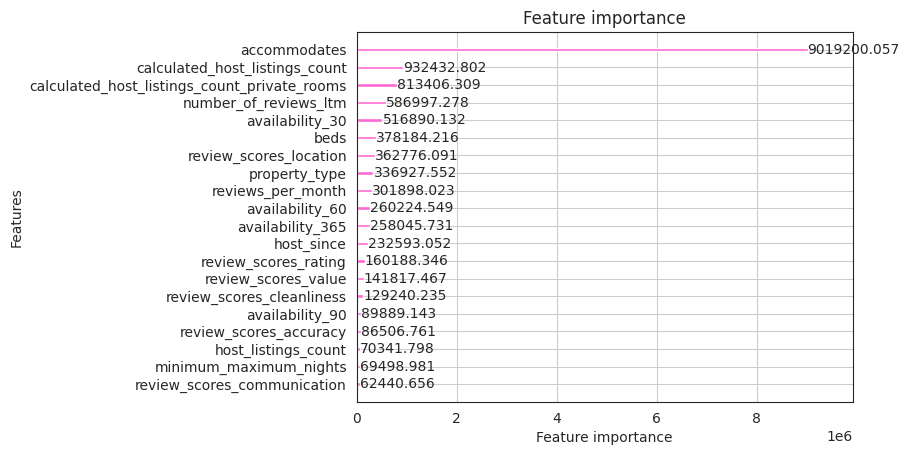

In [ ]:
# 7. Feature Importance
plot_importance(model, max_num_features=20, importance_type='gain')
plt.show()

In [ ]:
def calculate_mape(y_true, y_pred):
    """
    Calculate the mean absolute percentage error (MAPE) between true and predicted values.
    :param y_true: array-like of true values
    :param y_pred: array-like of predicted values
    :return: MAPE as a float
    """
    # Avoid division by zero; replace zero with a small number
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)  # np.finfo(float).eps is a very small number
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

# Assuming y_train, y_test, and model are already defined and your model is trained

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MAPE for training and test sets
train_mape = calculate_mape(y_train, y_train_pred)
test_mape = calculate_mape(y_test, y_test_pred)

# Print the metrics
print(f"Training MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")


Training MAPE: 13.17%
Test MAPE: 33.62%


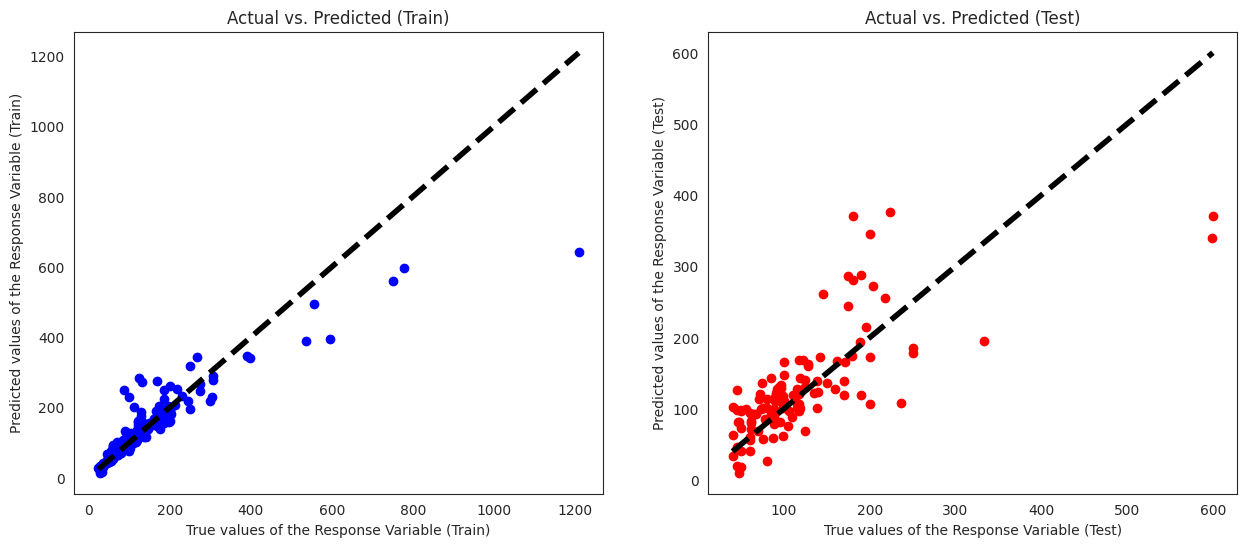

In [ ]:
# Plotting the actual vs predicted values for the training dataset
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.title('Actual vs. Predicted (Train)')
plt.xlabel('True values of the Response Variable (Train)')
plt.ylabel('Predicted values of the Response Variable (Train)')

# Plotting the actual vs predicted values for the testing dataset
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Actual vs. Predicted (Test)')
plt.xlabel('True values of the Response Variable (Test)')
plt.ylabel('Predicted values of the Response Variable (Test)')

# Show the plots
plt.show()

In [ ]:
# # Get feature importances
# feature_importances = model.feature_importances_

# # Assuming you have a list of feature names
# feature_names = model.feature_name_

# # Combine feature names and their importance scores
# feature_importance_dict = dict(zip(feature_names, feature_importances))

# # Sort features by importance
# sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# # Now you can print or analyze the sorted feature importances
# for feature, importance in sorted_feature_importance:
#     print(f"{feature}: {importance}")


# Covid model

In [ ]:
yay=df_listing[['covid_flag','host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'month', 'year']]

yay = yay.loc[yay['covid_flag']=='During Covid']
print(len(yay))

77


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor, plot_importance
import matplotlib.pyplot as plt

# Assuming yay is your DataFrame

# 1. Preprocessing
# Handle missing values (simple strategy: fill with median for numerical, mode for categorical)
yay = yay.fillna(yay.median(numeric_only=True))
yay = yay.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'O' else x)
yay = yay.loc[yay['price']<=1500]

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for column in yay.select_dtypes(include=['object', 'category']).columns:
    label_encoders[column] = LabelEncoder()
    yay[column] = label_encoders[column].fit_transform(yay[column])

# Split the data into features and target
X = yay.drop('price', axis=1)
y = yay['price']

# 2. Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:

# Optional: Dimensionality Reduction with PCA
# pca = PCA(n_components=0.95) # for example, keep 95% of variance
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# 3. Model Training with LightGBM
model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train, categorical_feature='auto')

# 4. Cross Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("CV RMSE:", np.sqrt(-cv_scores).mean())

# 5. Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test RMSE:", np.sqrt(mse))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 331
[LightGBM] [Info] Number of data points in the train set: 53, number of used features: 30
[LightGBM] [Info] Start training from score 122.415094
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
# Optional: 6. Grid Search for Hyperparameter Tuning (example parameters)
grid_params = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}
grid_search = GridSearchCV(model, grid_params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

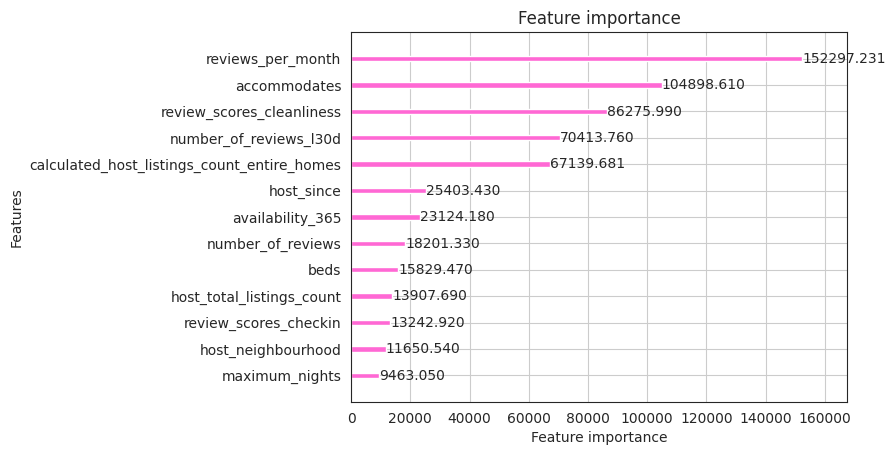

In [ ]:
# @title
# 7. Feature Importance
plot_importance(model, max_num_features=20, importance_type='gain')
plt.show()

In [ ]:
# Assuming y_train, y_test, and model are already defined and your model is trained

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MAPE for training and test sets
train_mape = calculate_mape(y_train, y_train_pred)
test_mape = calculate_mape(y_test, y_test_pred)

# Print the metrics
print(f"Training MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")

Training MAPE: 27.45%
Test MAPE: 30.03%


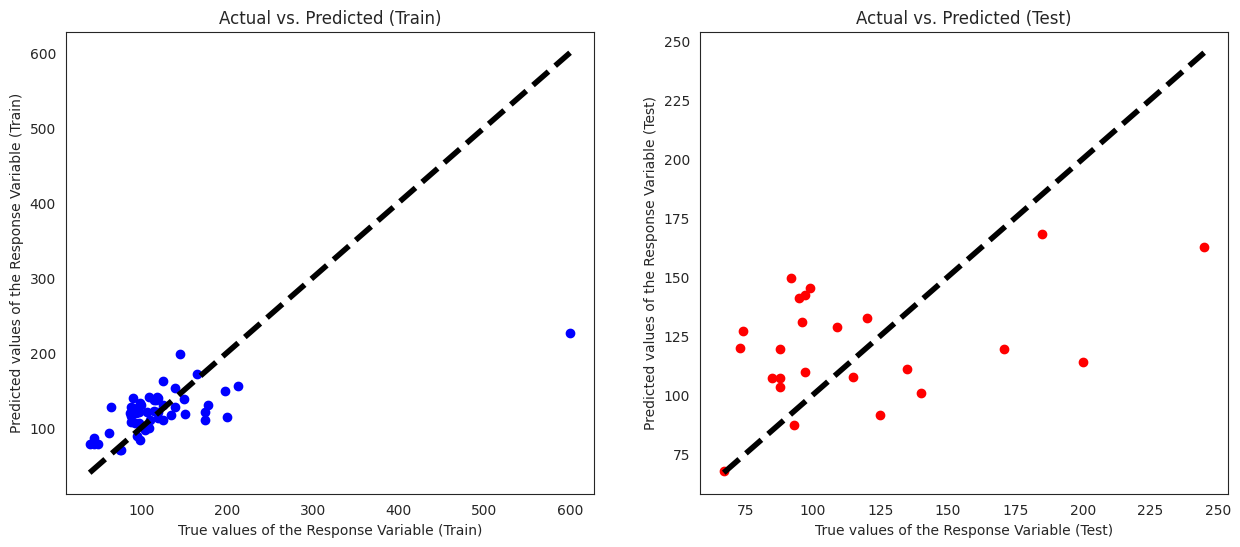

In [ ]:
# Plotting the actual vs predicted values for the training dataset
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.title('Actual vs. Predicted (Train)')
plt.xlabel('True values of the Response Variable (Train)')
plt.ylabel('Predicted values of the Response Variable (Train)')

# Plotting the actual vs predicted values for the testing dataset
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Actual vs. Predicted (Test)')
plt.xlabel('True values of the Response Variable (Test)')
plt.ylabel('Predicted values of the Response Variable (Test)')

# Show the plots
plt.show()